Вариант 12 Лабораторная работа №2. Линейные модели. Кросс-валидация.

В практических примерах ниже показано:

как пользоваться инструментами предварительного анализа для поиска линейных взаимосвязей;

как строить и интерпретировать линейные модели с логарифмами;

как оценивать точность моделей с перекрёстной проверкой (LOOCV, проверка по блокам).

Модели: множественная линейная регрессия

Зависимая переменная - Grad_Rate 

Независимые переменные:

1. Top_25_perc
2. F_Undergrad
3. Private

Задания:
   1. Данные своего варианта (см. таблицу ниже) разделить на выборку для построения моделей (80%) и отложенные наблюдения (20%). Оставить в таблице только указанные в варианте переменные. Отложенные наблюдения использовать только в задании 6.
   2. Провести предварительный анализ данных с помощью описательных статистик и графиков, оценить взаимосвязь.
   3. Проверить Y на нормальность. Если он распределён не по нормальному закону, прологарифмировать и снова провести анализ взаимосвязей переменных.
   4. Составить список возможных спецификаций моделей множественной регрессии (на исходной Y и на логарифме Y ).
   5. Оценить параметры моделей из списка. Оценить точность моделей методом перекрёстной проверки, указанным в варианте. Найти самую точную из моделей для Y . Найти самую точную из моделей для log(Y ).
   6. Сделать прогноз с помощью самых точных моделей на отложенные наблюдения. Рассчитать MSEtest вручную и выбрать одну наиболее точную модель. Проинтерпретировать её параметры.

Задание 1. Решение.

Загрузим все необходимые для работы модули, определим константы и загрузим входные данные. Во входных данных отфильтруем только необходимые нам для работы признаки.

Определим фиктивные переменные для качественного признака и объединим их с исходными данными.

Разделим исходную выборку на тренировочную и тестовую.

In [1]:

# настройка ширины страницы блокнота .......................................
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))


In [2]:

# загрузка пакетов: инструменты --------------------------------------------
# работа с массивами
import numpy as np
# фреймы данных
import pandas as pd
# графики
import matplotlib as mpl
# стили и шаблоны графиков на основе matplotlib
import seaborn as sns
# перекодировка категориальных переменных
from sklearn.preprocessing import LabelEncoder
# тест Шапиро-Уилка на нормальность распределения
from scipy.stats import shapiro
# для таймера
import time
# загрузка пакетов: модели -------------------------------------------------
# линейные модели
import sklearn.linear_model as skl_lm
# расчёт MSE
from sklearn.metrics import mean_squared_error
# кросс-валидация
from sklearn.model_selection import train_test_split, LeaveOneOut
from sklearn.model_selection import KFold, cross_val_score

In [3]:
# константы
# ядро для генератора случайных чисел
my_seed = 9212
# создаём псевдоним для короткого обращения к графикам
plt = mpl.pyplot
# настройка стиля и отображения графиков
# примеры стилей и шаблонов графиков: 
# http://tonysyu.github.io/raw_content/matplotlib-style-gallery/gallery.html
mpl.style.use('seaborn-whitegrid')
sns.set_palette("Set2")
# раскомментируйте следующую строку, чтобы посмотреть палитру
# sns.color_palette("Set2")

In [4]:
fileURL = 'College_for_lab.csv'
DF_raw = pd.read_csv(fileURL)
print(DF_raw.shape)

(777, 9)


In [5]:

# первые 5 строк фрейма
DF_raw.head(5)


,Grad_Rate,Accept,Top10perc,Top25perc,F_Undergrad,P_Undergrad,PhD,Expend,Private
0,60,1232,23,52,2885,537,70,7041,Yes
1,56,1924,16,29,2683,1227,29,10527,Yes
2,54,1097,22,50,1036,99,53,8735,Yes
3,59,349,60,89,510,63,92,19016,Yes
4,15,146,16,44,249,869,76,10922,Yes


In [6]:
DF_raw.dtypes


Grad_Rate       int64
Accept          int64
Top10perc       int64
Top25perc       int64
F_Undergrad     int64
P_Undergrad     int64
PhD             int64
Expend          int64
Private        object
dtype: object

In [7]:

# считаем пропуски в каждом столбце
DF_raw.isna().sum()


Grad_Rate      0
Accept         0
Top10perc      0
Top25perc      0
F_Undergrad    0
P_Undergrad    0
PhD            0
Expend         0
Private        0
dtype: int64

In [8]:
# PrivateYes
Private_dict = {'Yes' : 1, 'No' : 0}
DF_raw['PrivateYes'] = DF_raw.Private.map(Private_dict)


In [9]:
DF_raw.head(20)

,Grad_Rate,Accept,Top10perc,Top25perc,F_Undergrad,P_Undergrad,PhD,Expend,Private,PrivateYes
0,60,1232,23,52,2885,537,70,7041,Yes,1
1,56,1924,16,29,2683,1227,29,10527,Yes,1
2,54,1097,22,50,1036,99,53,8735,Yes,1
3,59,349,60,89,510,63,92,19016,Yes,1
4,15,146,16,44,249,869,76,10922,Yes,1
5,55,479,38,62,678,41,67,9727,Yes,1
6,63,340,17,45,416,230,90,8861,Yes,1
7,73,1720,37,68,1594,32,89,11487,Yes,1
8,80,839,30,63,973,306,79,11644,Yes,1
9,52,498,21,44,799,78,40,8991,Yes,1


In [10]:
# оставляем в наборе данных только то, что нужно 
# (плюс метки регионов для графиков)
DF_raw = DF_raw[['Grad_Rate', 'Top25perc', 'F_Undergrad', 'PrivateYes']]


In [11]:
DF_raw.head(20)

,Grad_Rate,Top25perc,F_Undergrad,PrivateYes
0,60,52,2885,1
1,56,29,2683,1
2,54,50,1036,1
3,59,89,510,1
4,15,44,249,1
5,55,62,678,1
6,63,45,416,1
7,73,68,1594,1
8,80,63,973,1
9,52,44,799,1


In [12]:

# данные для построения моделей
DF = DF_raw.sample(frac = 0.8, random_state = 15)
# данные для прогнозов
DF_predict = DF_raw.drop(DF.index)

In [13]:
DF[['Grad_Rate', 'Top25perc', 'F_Undergrad']].describe()

,Grad_Rate,Top25perc,F_Undergrad
count,622.000000,622.000000,622.000000
mean,66.131833,56.192926,3668.524116
std,17.148644,19.836808,4858.607449
min,10.000000,9.000000,139.000000
25%,54.000000,41.000000,1000.000000
50%,66.000000,54.000000,1707.000000
75%,79.000000,69.000000,3902.250000
max,118.000000,100.000000,31643.000000


Задание 2. Решение.

Проведем предварительный анализ данных на тренировочной выборке:

    1. Построим гистограммы распределения и графики зависимости количественных переменных;
    2. Построим гистограммы распределения и графики зависимости количественных переменных для разных значений качественной переменной;
    3. Построим матрицу корреляции количественных переменных;
    4. Построим матрицу корреляции количественных переменных для разных значений качественной переменной.

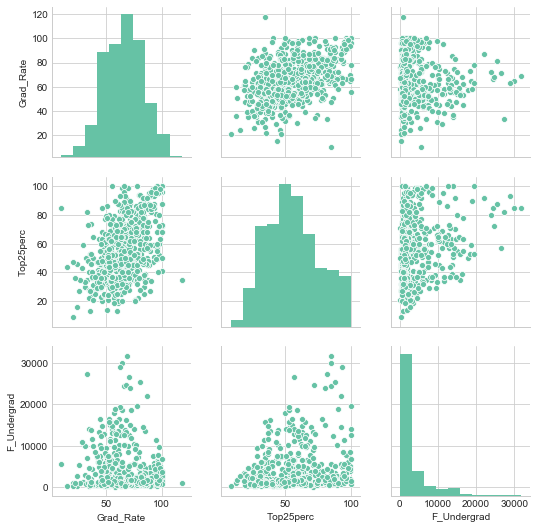

In [14]:
sns.pairplot(DF[['Grad_Rate', 'Top25perc', 'F_Undergrad']])
plt.show()


C:\Users\Admin\anaconda3\envs\env1\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Admin\anaconda3\envs\env1\lib\site-packages\statsmodels\nonparametric\kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\anaconda3\envs\env1\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\Users\Admin\anaconda3\envs\env1\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **pas

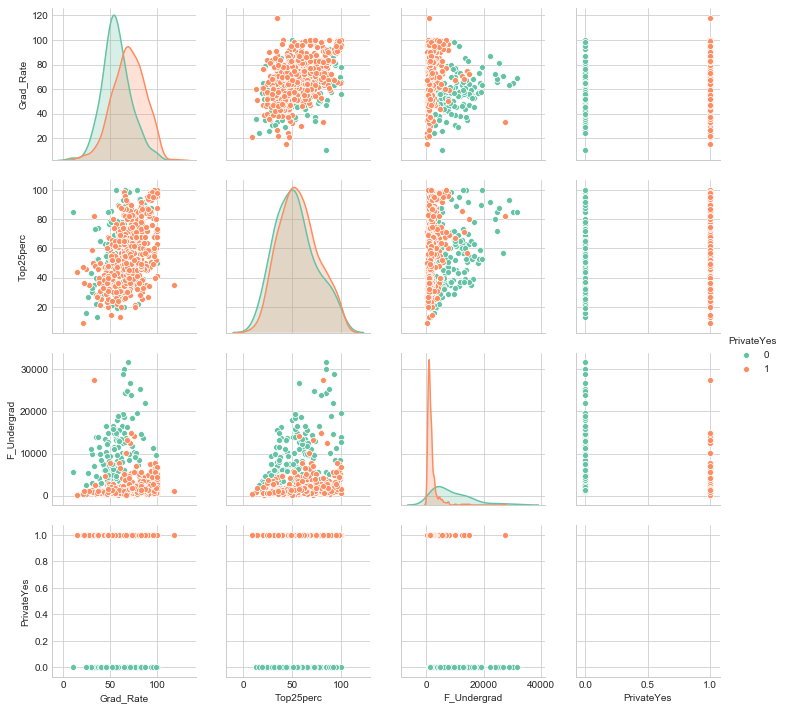

In [15]:
# матричный график разброса с цветом по Private
sns.pairplot(DF[['Grad_Rate', 'Top25perc', 'F_Undergrad',
                 'PrivateYes']], hue='PrivateYes')
plt.show()

In [16]:
# корреляционная матрица по всем наблюдениям
corr_mat = DF[['Grad_Rate', 'Top25perc', 'F_Undergrad']].corr()
corr_mat.style.background_gradient(cmap='coolwarm').set_precision(2)

,Grad_Rate,Top25perc,F_Undergrad
Grad_Rate,1,0.46,-0.078
Top25perc,0.46,1,0.21
F_Undergrad,-0.078,0.21,1


In [39]:
# корреляционная матрица по классу PrivateYes
corr_mat = DF.loc[DF['PrivateYes'] == 1][['Grad_Rate', 'Top25perc', 'F_Undergrad']].corr()
corr_mat.style.background_gradient(cmap='coolwarm').set_precision(2)


,Grad_Rate,Top25perc,F_Undergrad
Grad_Rate,1,0.48,0.14
Top25perc,0.48,1,0.32
F_Undergrad,0.14,0.32,1


In [40]:
# корреляционная матрица по классу PrivateNo
corr_mat = DF.loc[DF['PrivateYes'] == 0][['Grad_Rate', 'Top25perc', 'F_Undergrad']].corr()
corr_mat.style.background_gradient(cmap='coolwarm').set_precision(2)

,Grad_Rate,Top25perc,F_Undergrad
Grad_Rate,1,0.41,0.27
Top25perc,0.41,1,0.44
F_Undergrad,0.27,0.44,1


По гистограмме распределения "Grad_rate" можно сделать предположение, что данные распределены не нормально.

По матрицам корреляции видно, что значение переменной "PrivateYes" == 1 усиливает коррелированность "Top25perc", "F_Undergrad", а значение переменной "PrivateYes" == 0 усиливает "F_Undergrad" и ослабевает "Top25perc".

Задание 3. Решение.

Проверим распределение переменной "Grad_Rate" на нормальность при помощи теста Шапиро-Уилка. Если распределение не является нормальным, проверим логарифм переменной на нормальность.

In [17]:
# логарифмируем зависимую переменную
DF['log_Grad_Rate'] = np.log(DF['Grad_Rate'])
# описательные статистики для непрерывных показателей
DF[['Grad_Rate', 'log_Grad_Rate', 'Top25perc', 'F_Undergrad']].describe()

,Grad_Rate,log_Grad_Rate,Top25perc,F_Undergrad
count,622.000000,622.000000,622.000000,622.000000
mean,66.131833,4.153006,56.192926,3668.524116
std,17.148644,0.293193,19.836808,4858.607449
min,10.000000,2.302585,9.000000,139.000000
25%,54.000000,3.988984,41.000000,1000.000000
50%,66.000000,4.189655,54.000000,1707.000000
75%,79.000000,4.369448,69.000000,3902.250000
max,118.000000,4.770685,100.000000,31643.000000


In [18]:
# тестируем на нормальность
for col in ['Grad_Rate', 'log_Grad_Rate']:
 stat, p = shapiro(DF[col])
 print(col, 'Statistics=%.2f, p=%.4f' % (stat, p))
 # интерпретация
 alpha = 0.05
 if p > alpha:
     print('Распределение нормально (H0 не отклоняется)\n')
 else:
     print('Распределение не нормально (H0 отклоняется)\n')

Grad_Rate Statistics=0.99, p=0.0170
Распределение не нормально (H0 отклоняется)

log_Grad_Rate Statistics=0.93, p=0.0000
Распределение не нормально (H0 отклоняется)



Задание 3. Результаты.

Мы определили, что распределение переменной "Grad_Rate" не является нормальным, поэтому будем продолжать работать с "Log_Grad_Rate"

Задание 4. Решение. Результаты.

В соответствии с результатами задания 2 можно составить следующие линейные спецификации модели:

1. fit_lm_1: Grad_Rate = PrivateYes + Top25perc + F_Undergrad
2. fit_lm_2: Grad_Rate = PrivateYes + Top25perc * PrivateYes + F_Undergrad
3. fit_lm_3: Grad_Rate = PrivateYes + F_Undergrad * PrivateYes + Top25perc
4. fit_lm_4: Grad_Rate = PrivateYes + F_Undergrad * PrivateYes + Top25perc * PrivateYes
5. fit_lm_1_log : то же, что fit_lm_1 , но для зависимой Log_Grad_Rate
6. fit_lm_2_log : то же, что fit_lm_2 , но для зависимой Log_Grad_Rate
7. fit_lm_3_log : то же, что fit_lm_3 , но для зависимой Log_Grad_Rate
8. fit_lm_4_log : то же, что fit_lm_4 , но для зависимой Log_Grad_Rate
9. Кроме того, добавим в сравнение модели зависимости Grad_Rate и Log_Grad_Rate от всех объясняющих переменных: fit_lm_0 и fit_lm_0_log соответственно.


Задание 5. Решение.

Построим модели, определенные в задании 4. Оценим точность моделей методом
перекрёстной проверки. Найдём самую точную модель.

In [19]:
# данные для моделей 1, 5
df1 = DF[['Grad_Rate', 'PrivateYes', 'Top25perc', 'F_Undergrad']]
# данные для моделей 2, 6
df2 = DF[['Grad_Rate', 'PrivateYes', 'Top25perc', 'F_Undergrad']]
df2.loc[:, 'Top25perc_PrivateYes'] = df2.loc[:, 'Top25perc'] * df2.loc[:, 'PrivateYes']
df2 = df2.drop(['Top25perc'], axis=1)
# данные для моделей 3, 7
df3 = DF[['Grad_Rate', 'PrivateYes', 'Top25perc', 'F_Undergrad']]
df3.loc[:, 'F_Undergrad_PrivateYes'] = df3.loc[:, 'F_Undergrad'] * df3.loc[:, 'PrivateYes']
df3 = df3.drop(['F_Undergrad'], axis=1)
# данные для моделей 4, 8
df4 = DF[['Grad_Rate', 'PrivateYes', 'Top25perc', 'F_Undergrad']]
df4.loc[:, 'Top25perc_PrivateYes'] = df4.loc[:, 'Top25perc'] * df4.loc[:, 'PrivateYes']
df4.loc[:, 'F_Undergrad_PrivateYes'] = df4.loc[:, 'F_Undergrad'] * df4.loc[:, 'PrivateYes']
df4 = df4.drop(['Top25perc', 'F_Undergrad'], axis=1)
df0 = DF.drop(['log_Grad_Rate'], axis=1)


In [20]:
df4


,Grad_Rate,PrivateYes,Top25perc_PrivateYes,F_Undergrad_PrivateYes
728,90,1,93,4879
353,66,1,51,1452
175,78,1,63,1028
654,55,0,0,0
94,75,1,49,2159
690,47,1,68,2936
206,46,0,0,0
497,67,1,67,4576
619,66,0,0,0
735,64,1,25,2961


In [21]:
lm = skl_lm.LinearRegression()
# модель со всеми объясняющими, y
X = df0.drop(['Grad_Rate'], axis=1)
y = df0.Grad_Rate.values.reshape(-1, 1)
fit_lm_0 = lm.fit(X, y)
print('модель fit_lm_0:\n',
 'константа ', np.around(fit_lm_0.intercept_, 3),
 '\n объясняющие ', list(X.columns.values),
 '\n коэффициенты ', np.around(fit_lm_0.coef_, 3))

модель fit_lm_0:
 константа  [36.01] 
 объясняющие  ['Top25perc', 'F_Undergrad', 'PrivateYes'] 
 коэффициенты  [[ 0.373  0.    12.139]]


In [22]:
# оценим MSE на обучающей
# прогнозы
y_pred = fit_lm_0.predict(X)
MSE = sum((y - y_pred.reshape(-1, 1))**2) / len(y)
MSE

array([205.12279972])

In [23]:
# модель со всеми объясняющими, y_log
X = df0.drop(['Grad_Rate'], axis=1)
y = np.log(df0.Grad_Rate).values.reshape(-1, 1)
fit_lm_0_log = lm.fit(X, y)
print('модель fit_lm_0_log:\n',
 'константа ', np.around(fit_lm_0_log.intercept_, 3),
 '\n объясняющие ', list(X.columns.values),
 '\n коэффициенты ', np.around(fit_lm_0_log.coef_, 3))


модель fit_lm_0_log:
 константа  [3.664] 
 объясняющие  ['Top25perc', 'F_Undergrad', 'PrivateYes'] 
 коэффициенты  [[0.006 0.    0.207]]


In [24]:
# пересчёт константы для интерпретации
np.round(np.exp(fit_lm_0_log.intercept_), 1)

array([39.])

In [25]:
# пересчёт коэффициентов для их интерпретации
np.round((np.exp(fit_lm_0_log.coef_) - 1) * 100, 1)

array([[ 0.6,  0. , 23. ]])

In [26]:
# оценим MSE на обучающей
# прогнозы
y_pred = fit_lm_0_log.predict(X)
MSE_log = sum((np.exp(y) - np.exp(y_pred).reshape(-1, 1))**2) / len(y)
MSE_log

array([207.28711194])

In [27]:

print('MSE_train модели для Grad_Rate меньше MSE_train',
 'модели для log(Grad_Rate) в ', np.around(MSE_log / MSE, 1), 'раз')

MSE_train модели для Grad_Rate меньше MSE_train модели для log(Grad_Rate) в  [1.] раз


In [28]:

# LeaveOneOut CV
loo = LeaveOneOut()
# модели для y
scores = list()
# таймер
tic = time.perf_counter()
for df in [df0, df1, df2, df3, df4] :
     loo.get_n_splits(df)
     X = df.drop(['Grad_Rate'], axis=1)
     y = df.Grad_Rate
     score = cross_val_score(lm, X, y, cv=loo,
     scoring='neg_mean_squared_error').mean()
     scores.append(score)
# таймер
toc = time.perf_counter()
print(toc - tic)

4.4070253


In [29]:

# модели для y_log
scores_log = list()
# таймер
tic = time.perf_counter()
for df in [df0, df1, df2, df3, df4] :
 loo.get_n_splits(df)
 X = df.drop(['Grad_Rate'], axis=1)
 y = np.log(df.Grad_Rate)
 score = cross_val_score(lm, X, y, cv=loo, n_jobs=1,
 scoring='neg_mean_squared_error').mean()
 scores_log.append(score)
# таймер
toc = time.perf_counter()
print(toc - tic)

3.8103106999999996


In [30]:
[np.around(-x, 2) for x in scores]

[208.16, 208.16, 214.58, 211.65, 220.74]

In [31]:
[np.around(-x, 3) for x in scores_log]

[0.064, 0.064, 0.066, 0.065, 0.068]

In [32]:
# самая точная на Grad_Rate
fits = ['fit_lm_0', 'fit_lm_1', 'fit_lm_2', 'fit_lm_3', 'fit_lm_4']
print('Наименьшая ошибка на тестовой с LOOCV у модели',
 fits[scores.index(max(scores))],
 ':\nMSE_loocv =', np.around(-max(scores), 0))

Наименьшая ошибка на тестовой с LOOCV у модели fit_lm_1 :
MSE_loocv = 208.0


In [33]:
# самая точная на log(Grad_Rate)
fits = ['fit_lm_0_log', 'fit_lm_1_log', 'fit_lm_2_log',
 'fit_lm_3_log', 'fit_lm_4_log']
print('Наименьшая ошибка на тестовой с LOOCV у модели',
 fits[scores_log.index(max(scores_log))],
 ':\nMSE_loocv =', np.around(-max(scores_log), 3))

Наименьшая ошибка на тестовой с LOOCV у модели fit_lm_0_log :
MSE_loocv = 0.064


Задание 5. Результаты.

Мы определили, что наименьшую ошибку перекрёстной проверки выдает модель fit_lm_1 и модель fit_lm_0_log.

Задание 6. Решение.

Сделаем прогноз моделей fit_lm_1 и  fit_lm_0_log на отложенных наблюдениях. Оценим точность прогноза по этим моделям на отложенные
наблюдения

In [34]:
# прогноз по fit_lm_3
# модель на всех обучающих наблюдениях
X = df1.drop(['Grad_Rate'], axis=1)
y = df1.Grad_Rate.values.reshape(-1, 1)
fit_lm_1 = lm.fit(X, y)
# значения y на отложенных наблюдениях
y = DF_predict[['Grad_Rate']].values.reshape(-1, 1)
# матрица объясняющих на отложенных наблюдениях
X = DF_predict[['PrivateYes', 'Top25perc', 'F_Undergrad']]
# прогнозы
y_pred = fit_lm_1.predict(X)
# ошибка
MSE = sum((y - y_pred.reshape(-1, 1))**2) / len(y)
print('MSE модели fit_lm_1 на отложенных наблюдениях = %.2f' % MSE)

MSE модели fit_lm_1 на отложенных наблюдениях = 192.94


In [35]:
# прогноз по fit_lm_log_0
# модель
X = df0.drop(['Grad_Rate'], axis=1)
y = np.log(df0.Grad_Rate).values.reshape(-1, 1)
fit_lm_0_log = lm.fit(X, y)
# значения y на отложенных наблюдениях
y = np.log(DF_predict[['Grad_Rate']].values.reshape(-1, 1))
# матрица объясняющих на отложенных наблюдениях
X = DF_predict.drop(['Grad_Rate'], axis=1)
# прогнозы
y_pred = fit_lm_0_log.predict(X)
# ошибка
MSE_log = sum((np.exp(y) - np.exp(y_pred).reshape(-1, 1))**2) / len(y)
print('MSE модели fit_lm_0_log на отложенных наблюдениях = %.2f' % MSE_log)

MSE модели fit_lm_0_log на отложенных наблюдениях = 185.10


Очевидно, на выборке для прогноза точнее модель fit_lm_0_log :

In [42]:
# ещё раз строим на обучающей
X = df0.drop(['Grad_Rate'], axis=1)
y = np.log(df0.Grad_Rate).values.reshape(-1, 1)
fit_lm_0_log = lm.fit(X, y)
print('модель fit_lm_0_log:\n',
 'константа ', np.around(fit_lm_0_log.intercept_, 3),
 '\n объясняющие ', list(df0.drop(['Grad_Rate'], axis=1).columns.values),
 '\n коэффициенты ', np.around(fit_lm_0_log.coef_, 3))


модель fit_lm_0_log:
 константа  [3.664] 
 объясняющие  ['Top25perc', 'F_Undergrad', 'PrivateYes'] 
 коэффициенты  [[0.006 0.    0.207]]


In [37]:
# делаем данные для модели из отложенных наблюдений
df0 = DF.drop(['log_Grad_Rate'], axis=1)
X = df0.drop(['Grad_Rate'], axis=1)
y = np.log(df0.Grad_Rate).values.reshape(-1, 1)
# прогноз
y_pred = fit_lm_0_log.predict(X)
# ошибка
MSE = sum((y - y_pred.reshape(-1, 1))**2) / len(y)
np.around(MSE, 2)

array([0.06])

In [38]:
 # сравниваем ошибку со средним значением Y на отложенных
print('Ошибка модели на отложенных наблюдениях составила ',
 np.around(np.sqrt(MSE) / np.mean(y) * 100, 1)[0],'% от среднего значения Y',
 sep='')

Ошибка модели на отложенных наблюдениях составила 6.0% от среднего значения Y


Задание 6. Результаты.

Ошибка модели на отложенных наблюдениях составила 6.0% от среднего значения Y.

В результате построения на всех данных была получена модель:

Grad_Rate = 0.006 * Top25Perc + 0. * F_Undergrad + 0.207 * PrivateYes

Ее параметры можно интерпретировать следующим образом:

1. При увеличении выпускного балла на 1, процент зачисленных студентов, которые в старшей школе относились к топ-25% в диапазоне по освоению увеличится на 0.006 единиц.
2. Частный или государственный университет имеет влияние.